In [1]:
import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# URL of the API endpoint
url = "https://www.imf.org/external/datamapper/api/v1/NGDPD/VNM"
 
# Sending a GET request to the API endpoint
response = requests.get(url)
 
# Checking if the request was successful (status code 200)
if response.status_code == 200:
    # Extracting JSON data from the response
    data = response.json()
 
    # Extracting values from the JSON data
    values = data['values']['NGDPD']['VNM']
 
    # Creating a pandas DataFrame from the extracted data
    gdp = pd.DataFrame(list(values.items()), columns=['Year', 'Nominal GDP (in current USD billions)'])
    # Converting 'Year' column to integer type
    gdp['Year'] = pd.to_numeric(gdp['Year'])
    # Narrowing down to 2003 onwards
    gdp = gdp[gdp['Year']>=2003]
    # Setting 'Year' column as index
    gdp.set_index('Year', inplace=True)
   
else:
    print("Failed to fetch data from the API.")

In [3]:
# Extracting data from Yahoo Finance
try:
    # Fetch data for USD/VND using a different ticker symbol
    usd_vnd_data = yf.download('USDVND=X', start='2000-01-01', end='2024-03-19')
    
    # Extract Adjusted Close prices
    fxdata = usd_vnd_data['Adj Close']
    
    # Ensure the index is a DatetimeIndex
    fxdata.index = pd.to_datetime(fxdata.index)
    
    # Resample data annually and take the last value of each year
    fxdata = fxdata.resample('Y').last()
    
    # Rename column to 'Adjusted Close'
    fxdata.columns = ['Adjusted Close']
    
    # Extracting year from the index
    fxdata.index = fxdata.index.year
    
except Exception as e:
    print("An error occurred:", e)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Combining Dataframes
finaldata = gdp.merge(fxdata, left_index=True, right_index=True)
finaldata.columns = ['X','Y']

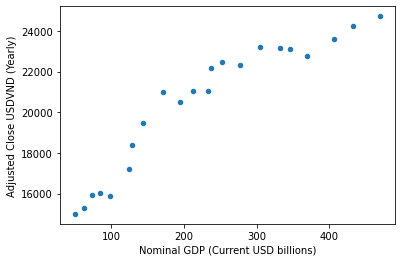

In [5]:
# Plotting GDP against FX
scatter = finaldata.plot(x='X', y='Y', kind='scatter', 
                         ylabel='Adjusted Close USDVND (Yearly)',
                         xlabel='Nominal GDP (Current USD billions)')

Text(0.075, 0.82, '$R^2 = 0.8799$')

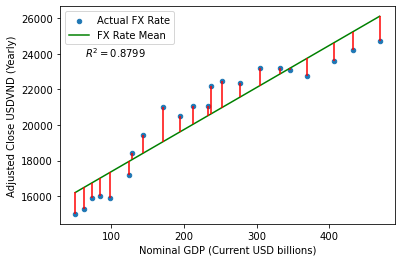

In [6]:
# Splitting the data into features (X) and target variable (y)
X = final_data[['GDP per Capita (Current Prices) Growth','Current Account Balance','Average CPI']]
y = final_data['VND USD Rate'].values.flatten()  # Flattening y to ensure it's a 1D array

model = LinearRegression()
model.fit(X, y)

# Predicting FX rate
y_pred = model.predict(X)

# Calculate R-squared
r_squared = model.score(X, y)

# Plotting the multivariate regression with legends, variable annotations, and R-squared value
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multivariate Linear Regression (R-squared: {:.2f})'.format(r_squared))
plt.legend()
plt.grid(True)
plt.show()